 <br> <center><font color="#000099" size=7 >Algoritmi za sortiranje </font></center>

---
<br>

<center><font color="#0059b3" size=6>Ideja </font></center>

<center><font size=3>
<li> Implementirati već poznate nam algoritme za sortiranje
<li> Razmisliti o načinu ubrzanja koda i primijeniti ga, te testirati brzine
<li> Promotriti postupak izvođenja koraka algoritama</li>
</font> </center>

<br><font color="#004080" size=6>Insertion sort</font><br>

* Podsjeća nas na metodu koju koriste kartaši u sortiranju svojih karata
* Svrstavamo ga u algoritme za sortiranje koji se svode na umetanje novog elementa u već sortirani niz elemenata

* Gradi završni sortirani niz jedan po jedan element

In [95]:
import pylab
import time
import random
import copy as cp
import numpy as np
import matplotlib.pyplot as plt

from random import shuffle
from IPython.display import display,clear_output


Implementacija insertion sorta:

In [96]:
def insertion_sort(a):
    for i in range (len(a)):
        j=i
        while(j>0 and a[j-1]> a[j]):
            a[j-1],a[j]=a[j], a[j-1]
            j-=1
    return a

Uzet ćemo dvije liste. 
Jednu listu sa nasumično odabranih 20 cijelih brojeva. 
Druga lista će se sastojati od istih elemenata kao i prva samo neće biti ponavljajućih elemenata i biti će sortirana. Prvu ćemo zatim sortirati sa insertion sortom.

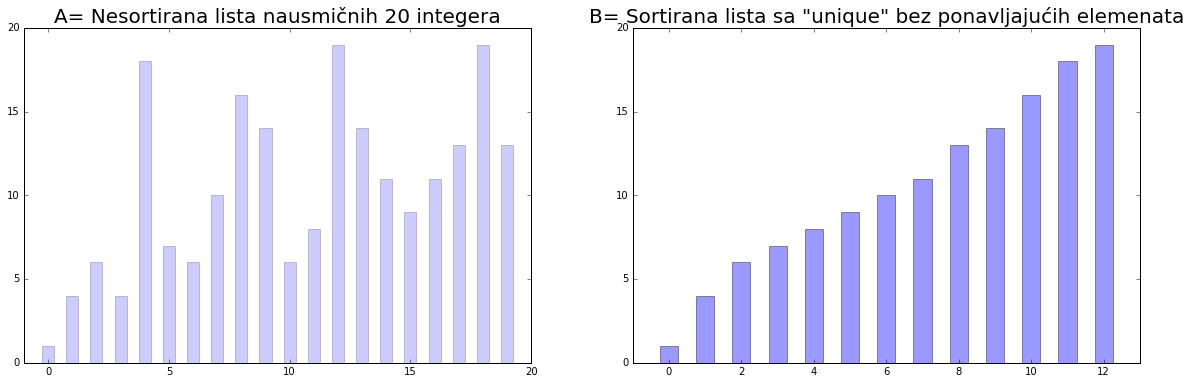

In [97]:
lista=np.random.randint(1,high=20, size=20)
lista_unique=np.unique(lista)

x=np.arange(0,len(lista),1 )
x_unique=np.arange(0,len(lista_unique), 1)

fig, axes = plt.subplots(1, 2, figsize=(20,6), frameon=False)
for ax in axes: ax.patch.set_facecolor('None'), ax.tick_params(color='black')
axes[0].bar(x, lista, align="center", width=0.5, alpha=0.2)
axes[0].set_title('A= Nesortirana lista nausmičnih 20 integera', fontsize=20)
axes[0].set_xlim(-1, 20),axes[0].set_ylim(0, 20);
axes[1].bar(x_unique, lista_unique, align="center", width=0.5, alpha=0.4)
axes[1].set_title('B= Sortirana lista sa "unique" bez ponavljajućih elemenata',fontsize=20)
axes[1].set_xlim(-1, len(lista_unique)),axes[1].set_ylim(0, 20);


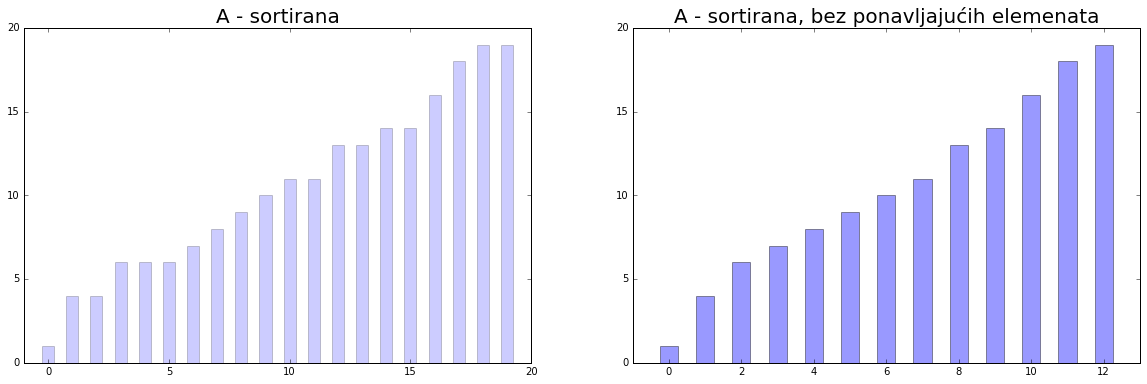

In [98]:
sortirana_lista=insertion_sort(lista)

# uzeti ćemo listu sa ponavljajućim elementima koju smo sortirali, i iz nje izvaditi ponavljajuće elemente
# no ostaviti ćemo ju u istom poretku kakvu smo i uzeli(nećemo koristiti sort od funkcije unique)

sortirana_lista_unique, index = np.unique(sortirana_lista, return_index=True)
A_finalna= sortirana_lista_unique[index.argsort()]


fig, axes = plt.subplots(1, 2, figsize=(20,6))
axes[0].bar(x, sortirana_lista, align="center", width=0.5, alpha=0.2)
axes[0].set_title('A - sortirana', fontsize=20)
axes[0].set_xlim(-1, 20), axes[0].set_ylim(0, 20)
axes[1].bar(x_unique, A_finalna, align="center", width=0.5, alpha=0.4)
axes[1].set_title('A - sortirana, bez ponavljajućih elemenata', fontsize=20)
axes[1].set_xlim(-1, len(lista_unique)),axes[1].set_ylim(0, 20);



Vidimo da se slike u drugom stupcu podudaraju, no možemo još i računski provjeriti je li A-sortirana, bez ponavljajućih elemenata jednaka listi B.

In [99]:
np.array_equiv(A_finalna,lista_unique)

True

### Pokažimo kako insertion sort radi:

<font size=3>U svakom prolasku uzimamo prvi idući element iz nesortiranog dijela liste, uspoređujemo ga sa elementima ispred sebe i tako ga ubacujemo na pravo mjesto, u sortirani dio liste.</font>


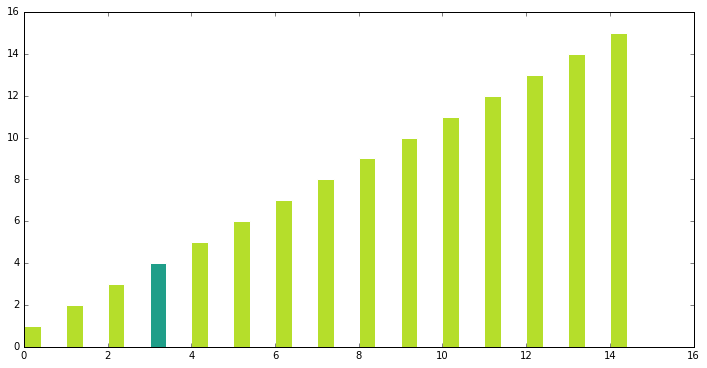

In [101]:
def insertion_sort_anim(a):
    
    fig=plt.figure()
    fig.set_size_inches(12,6)
    length=len(a)
    
    cmap = plt.get_cmap('viridis')
    indices = np.linspace(0, cmap.N, 10)
    x = range(length)
    width=0.4
   
      
    for i in range (len(a)):
        j=i
        while(j>0 and a[j-1]> a[j]):
            #slika prije zamjene
            plt.cla()
            colors=[]
            for k in range(length):
                        if (k==j) : colors.append(cmap(int(indices[5])))
                        elif(k==i+1): colors.append(cmap(int(indices[0])))
                        else: colors.append(cmap(int(indices[8])))
            plt.bar(x,a, width=width,color=colors,edgecolor = "white")
            display(fig)
            clear_output(wait=True)
            time.sleep(0.005)
            
            a[j-1],a[j]=a[j], a[j-1]
            
            #slika nakon zamjene
            plt.cla()
            colors=[]
            for k in range(length):
                        if (k==j-1) : colors.append(cmap(int(indices[5])))
                        elif(k==i+1): colors.append(cmap(int(indices[0])))
                        else: colors.append(cmap(int(indices[8])))
            plt.bar(x,a, width=width,color=colors,edgecolor = "white")
            display(fig)
            clear_output(wait=True)
            time.sleep(0.005)
            j-=1
            
    return a

a=random.sample(range(1, 16), 15)
insertion_sort_anim(a);

<br><font size=4>Ako želite i sami isprobati radi li insertion sort na različitim duljinama niza</font>

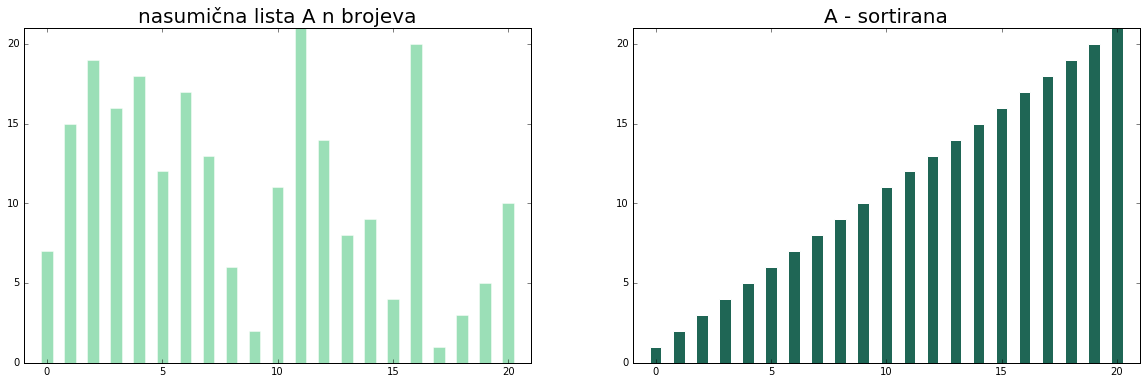

In [102]:
from ipywidgets import interact, fixed
def insertion_sort(n):
    a=random.sample(range(1, n+1), n)
    
    x=np.arange(0,n,1 )
    fig, axes = plt.subplots(1, 2, figsize=(20,6))
    axes[0].bar(x, a, align="center", width=0.5, alpha=0.450, edgecolor="white", color="#23BA60")
    axes[0].set_title('nasumična lista A n brojeva', fontsize=20)
    axes[0].set_xlim(-1, n), axes[0].set_ylim(0, n)
       
    for i in range (n):
        j=i
        while(j>0 and a[j-1]> a[j]):
            a[j-1],a[j]=a[j], a[j-1]
            j-=1
            
    axes[1].bar(x, a, align="center", width=0.5, alpha=1, edgecolor="white", color="#1F6655")
    axes[1].set_title('A - sortirana', fontsize=20)
    axes[1].set_xlim(-1, n),axes[1].set_ylim(0,n);
    
interact(insertion_sort, n=(10,50));

<br><font color="#004080" size=6>Bubble sort</font><br>

<font size=3>Bubble-sort je (dokazano) najbrži algoritam za sortiranje u okviru određenih okolnosti.<br>  

Postao je izvorno dobro poznat prije svega jer je to jedan od prvih algoritama (bilo koje vrste), koji se rigorozno analizirao, te je pronađen dokaz da je optimalan unutar svojih ograničenih okolnosti.<br>
Zamislite datoteke koje su pohranjene na zapisnoj vrpci, te tako malo radnu memoriju u koju možete učitati samo dva zapisa u u bilo kojem trenutku.<br><br>

Premotavanje vrpce je toliko sporo da je slučajni pristup podacima unutar datoteke jako nepraktičan.
Dakle, želimo obraditi zapise sekvencijalno, ne više od dva u isto vrijeme.<br><br>

Kada se još radilo sa zapisnim vrpcama,a strojevi su imali tek nekoliko tisuća riječi/bajta RAM-a, shvatilo se da je to dovoljno često korištena pojava o kojoj se isplati istraživati.<br>
Takvih okolnosti sada više nema, pa istraživanje performansa Bubble-sorta gotovo uopće nema smisla.
No, u današnje vrijeme kada nas se uči Bubble-sortu uopće se ne spominje optimalni slučaj i njegova povijest, pa kada bi se netko i našao u pravoj situaciji, vjerojatno ne bi znao iskoristiti Bubble-sort.</font>


### Promotriti ćemo Bubble sort i njegove implementacije.

In [103]:
def bubblesort(a):
    length = len(a)
    for i in range(length):
        for j in range(1, length):
            if a[j] < a[j-1]:
                a[j-1], a[j] = a[j], a[j-1]
    return a

<font size=4>Prvo pogledajmo kako on uopće radi: </font>

In [104]:
from IPython.display import HTML
HTML('<iframe width="1100" height="500" frameborder="0" src="https://goo.gl/vJGq08"> </iframe>')

<br><font size=3> U sljedećoj animaciji prikazuje se jedan prolazak Bubble sorta,
gdje se vidi kako se u jednom trenutku zamijenjuju dvije vrijednosti.</font>

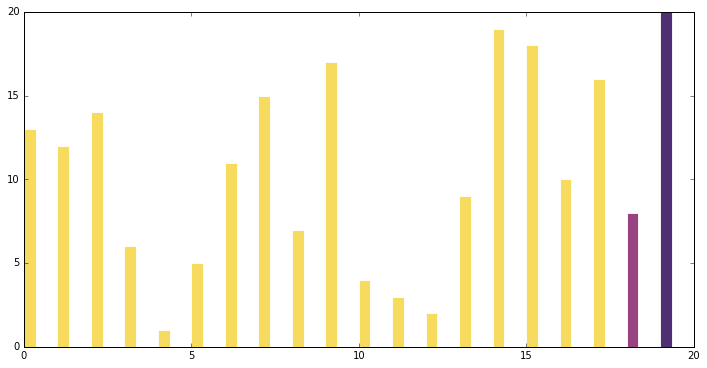

In [105]:
def bubblesort_anim(a):
    length=len(a)
    x = range(length)
    width=0.35
    zamjena = True
    fig=plt.figure()
    cmap = plt.get_cmap('inferno')
    indices = np.linspace(0, cmap.N, 20)
   
    for i in range(length-1):
        if a[i] > a[i+1]:
            colors = []
            for j in range(length):
                if (j == i) : colors.append(cmap(int(indices[3])))
                elif(j==i+1): colors.append(cmap(int(indices[7])))
                else: colors.append(cmap(int(indices[17])))
            fig.set_size_inches(12,6)
            plt.cla()
            plt.bar(x,a, width=width, color=colors, edgecolor="white", alpha=0.85)
            display(fig)
            clear_output(wait=True)
            time.sleep(0.10)
            
            a[i+1], a[i] = a[i], a[i+1] # swap
            zamjena = True
            
            colors = []
            for j in range(length):
                if (j == i) : colors.append(cmap(int(indices[7])))
                elif(j==i+1): colors.append(cmap(int(indices[3])))
                else: colors.append(cmap(int(indices[17])))
            fig.set_size_inches(12,6)
            plt.cla()
            plt.bar(x,a, width=width, color=colors, edgecolor="white", alpha=0.85)
            display(fig)
            clear_output(wait=True)
            time.sleep(0.06)
                 
a = list(range(1,21))
shuffle(a)
bubblesort_anim(a)

<font size=3>Zatim stavljamo poboljšanu verziju, koja se brine za to da sortiranje stane čim nije potrebno više zamjena</font>

In [106]:
def bubblesort_improved(a):
    length = len(a)
    swapped = 1
    for i in range(length):
        if swapped: 
            swapped = 0
            for ele in range(length-i-1):
                if a[ele] > a[ele + 1]:
                    temp = a[ele + 1]
                    a[ele + 1] = a[ele]
                    a[ele] = temp
                    swapped = 1
    return a

Želimo provjeriti da su liste koje dobijemo sa običnim i poboljšanim bubble-sortom iste:

In [107]:
l = [random.randint(1,1000) for num in range(1, 1000)]
l_sortirana = sorted(l)
#za funkcije bubblesort i bubblesort_improved provjeravamo
for f in [bubblesort, bubblesort_improved]: 
    assert(l_sortirana  == f(cp.copy(l))), "ne radi"
print("Oba bubblesorta daju isti rezultat")


Oba bubblesorta daju isti rezultat


<br>
### Usporedimo brzine običnog i poboljšanog bubble-sorta

* sa manjom listom

In [108]:
l_mala = [random.randint(1,100) for num in range(1, 100)]
l_mala_cp = cp.copy(l_mala)

%timeit bubblesort(l_mala)
%timeit bubblesort_improved(l_mala_cp)

The slowest run took 6.87 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 1.04 ms per loop
The slowest run took 74.95 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 13.5 µs per loop


* sa većom listom

In [109]:
l_velika = [random.randint(1,10000) for num in range(1, 10000)]
l_velika_cp = cp.copy(l_velika)

%timeit bubblesort(l_velika)
%timeit bubblesort_improved(l_velika_cp)

1 loop, best of 3: 16.8 s per loop
The slowest run took 7073.17 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 1.78 ms per loop


<br><font size=4>Iduća animacija prikazuje korake nakon svakog prolaska poljem </font>

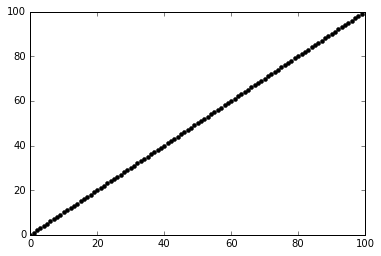

In [110]:
def bubblesort_anim(a):
    length=len(a)
    x = range(length)    
    zamjena = True
    fig, ax = plt.subplots()
    while zamjena: 
        zamjena = False
        for i in range(length-1):
            if a[i] > a[i+1]:
                a[i+1], a[i] = a[i], a[i+1] #ovdje radimo zamjenu
                zamjena = True
        ax.cla() 
        ax.plot(x,a,'k.',markersize=8)
        display(fig)
        clear_output(wait=True)
        time.sleep(0.003)
                 
a = list(range(100))
shuffle(a)
bubblesort_anim(a)

<br><br><font color="#004080" size=6>Quicksort</font>

<br><font size=4>
* Koristi podijeli-pa-vladaj pristup
* U svrhu sortiranja poziva sam sebe
* Da bi sortirali polje podijelimo ga na dva manja dijela i sortiramo ih rekurzivno</font>

In [111]:
def quicksort(l,u,a):
    if(l >= u): return
    m = l;
    for i in range(l + 1, u + 1):
        if (a[i] < a[l]): 
            a[++m], a[i] = a[i], a[++m]
    a[l], a[m] = a[m], a[l]
    quicksort(l, m-1,a)
    quicksort(m+1,u,a)

<br><font size=4><center>Implementacija bržeg quicksorta</center></font>

Koristimo dvostrano particioniranje, odnosno
* uzimamo indekse i, i jot koji su inicijalizirani na dva kraja polja koje želimo particionirati
*  prva unutarnja petlja miče i preko manjih elemenata i staje kada naiđe na element veći od pivota
* ruga unutarnja petlja miče jot od većih elemenata i staje kada naiđe na manji
element od pivota
* glavna petlja tada testira jesu li se indeksi prekrižili
* ako nisu mijenja im vrijednosti

In [112]:
def quicksort_faster(l,u,a):
    if(l >= u): return
    t = a[l]; i=l; j=u+1;
    while(1):
        i+=1
        j-=1
        while (i<=u and a[i]<t): i+=1
        while (a[j]>t) : j-=1
        if (i>j): break
        a[i],a[j]=a[j],a[i]
    
    a[l],a[j]=a[j],a[l]
    quicksort_faster(l,j-1,a)
    quicksort_faster(j+1,u,a)

<font size=3> Usporedba polja dobivenih sporijim i bržim quicksortom</font>

In [113]:
a=random.sample(range(1, 41), 40)
a_copy= cp.copy(a)
quicksort(0,len(a)-1,a)
quicksort_faster(0,len(a)-1,a_copy)

print(a)
print(a_copy)

np.array_equiv(a,a_copy)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


True

<font size=3> Usporedba brzina</font>

In [114]:
l_mala = [random.randint(1,100) for num in range(1, 100)]
l_mala_cp = cp.copy(l_mala)

%timeit quicksort(0, len(l_mala)-1, l_mala)
%timeit quicksort_faster(0, len(l_mala_cp)-1, l_mala_cp)

1000 loops, best of 3: 472 µs per loop
1000 loops, best of 3: 418 µs per loop


Razlika u brzinama bi bila vidljivija na puno većim poljima

<br><font size=4>Iduća animacija prikazuje korake nakon svakog prolaska rekurzivnim potpoljima </font>

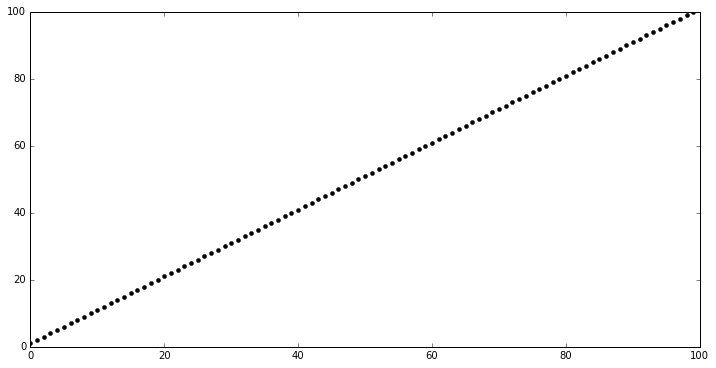

In [115]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
def quicksort_anim(l,u,a):
    length=len(a)
    x = range(length)        
    if(l >= u): return    
    m = l;
    for i in range(l + 1, u + 1):
        if (a[i] < a[l]): 
            m+=1
            a[m], a[i] = a[i], a[m]
    a[l], a[m] = a[m], a[l]
    
    ax.cla(),  ax.plot(x,a,'k.',markersize=8), display(fig), clear_output(wait=True), time.sleep(0.0005)
       
    quicksort_anim(l, m-1,a)
    
    ax.cla(),  ax.plot(x,a,'k.',markersize=8), display(fig), clear_output(wait=True), time.sleep(0.0005)
      
    quicksort_anim(m+1,u,a)
    
    ax.cla(),  ax.plot(x,a,'k.',markersize=8), display(fig), clear_output(wait=True), time.sleep(0.0005)
    
    
    

a=random.sample(range(1, 101), 100)
quicksort_anim(0,len(a)-1,a)

<br><font size=4>Pokažimo što radi jedan prolazak kroz polje u Quicksortu sa dvostranim particioniranjem</font>

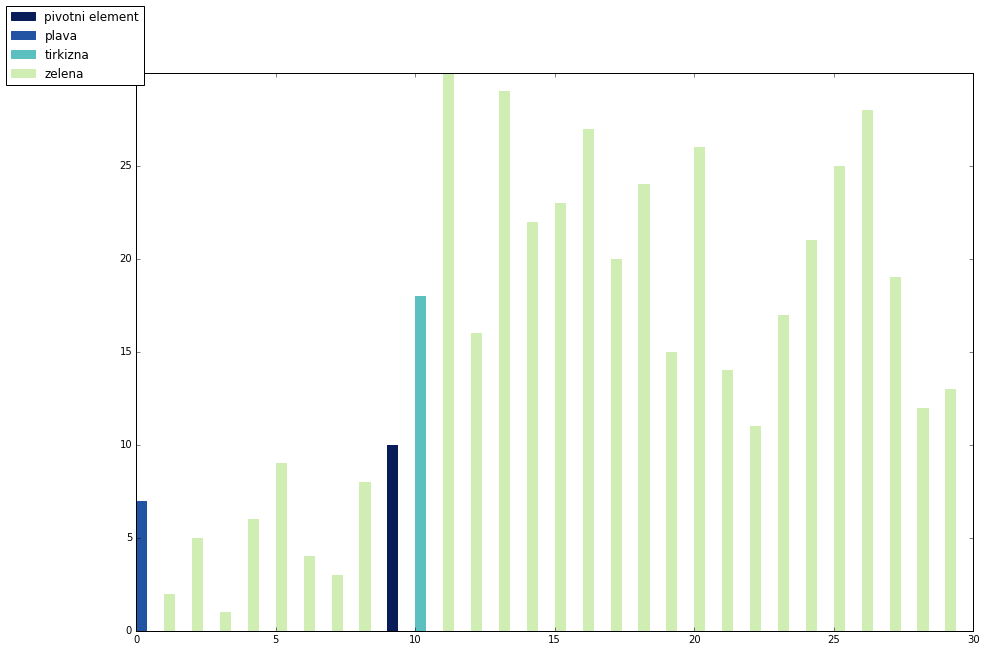

In [116]:
import matplotlib.patches as mpatches
def quicksort_faster(l,u,a):
    fig=plt.figure()
    fig.set_size_inches(15,10)
    length=len(a)
    
    cmap = plt.get_cmap('YlGnBu')
    indices = np.linspace(0, cmap.N, 10)
    
    tamno_plava = mpatches.Patch(color=cmap(int(indices[9])))
    tirkizna = mpatches.Patch(color=cmap(int(indices[4])))
    plava = mpatches.Patch(color=cmap(int(indices[7])))
    zelena = mpatches.Patch(color=cmap(int(indices[2])))

    
    fig.legend(handles=[tamno_plava, plava,tirkizna , zelena], labels=["pivotni element", "plava","tirkizna" , "zelena"],loc=2)
    
    x = range(length)
    width=0.4
    if(l >= u): return
    t = a[l]; i=l; j=u+1;
    while(1):
        i+=1
        j-=1
        while (i<=u and a[i]<t): 
            i+=1
            plt.cla()
            colors=[]
            for k in range(length):
                        if (k==i) : colors.append(cmap(int(indices[7])))
                        elif(k==l): colors.append(cmap(int(indices[9])))
                        elif(k==j): colors.append(cmap(int(indices[4])))
                        else: colors.append(cmap(int(indices[2])))
            plt.bar(x,a, width=width,color=colors,edgecolor = "none")
            display(fig)
            clear_output(wait=True)
            time.sleep(0.09)
        
        my_colors = [cmap(int(i)) for i in indices]
        while (a[j]>t) :
            j-=1
            
            plt.cla()
            colors=[]
            for k in range(length):
                        if (k==i) : colors.append(cmap(int(indices[7])))
                        elif(k==l): colors.append(cmap(int(indices[9])))
                        elif (k==j):colors.append(cmap(int(indices[4])))
                        else: colors.append(cmap(int(indices[2])))
            plt.bar(x,a, width=width,color=colors, edgecolor = "none")
            display(fig)
            clear_output(wait=True)
            time.sleep(0.09)
           
        if (i>j): break
        a[i],a[j]=a[j],a[i]
        
        plt.cla()
        colors=[]
        for k in range(length):
                        if (k==j) : colors.append(cmap(int(indices[7])))
                        elif(k==l): colors.append(cmap(int(indices[9])))
                        elif(k==i) :colors.append(cmap(int(indices[4])))
                        else:colors.append(cmap(int(indices[2])))
        plt.bar(x,a, width=width,color=colors,edgecolor = "none")
        display(fig)
        clear_output(wait=True)
        time.sleep(0.09)
    
    fig.savefig("prije_zamjene_pivota.png", dpi=200);
    a[l],a[j]=a[j],a[l]
    plt.cla()
    colors=[]
    for k in range(length):
                    if (k==l) : colors.append(cmap(int(indices[7])))
                    elif(k==j):colors.append(cmap(int(indices[9])))
                    elif (k==i) :colors.append(cmap(int(indices[4])))
                    else:colors.append(cmap(int(indices[2])))
    plt.bar(x,a, width=width,color=colors,edgecolor = "none")
    fig.savefig("nakon_zamjene_pivota.png", dpi=200);
    
    
    
a=random.sample(range(1, 31), 30)
quicksort_faster(0,len(a)-1,a)

<font size=3>Tamno plava je pivotni element. Tirkizna boja ide s desna i traži prvi stupac koji je manji od pivota.
Plava boja ide s lijeva i traži prvi element koji je veći od pivota.
Zatim se ta dva zamjenjuju.</font>

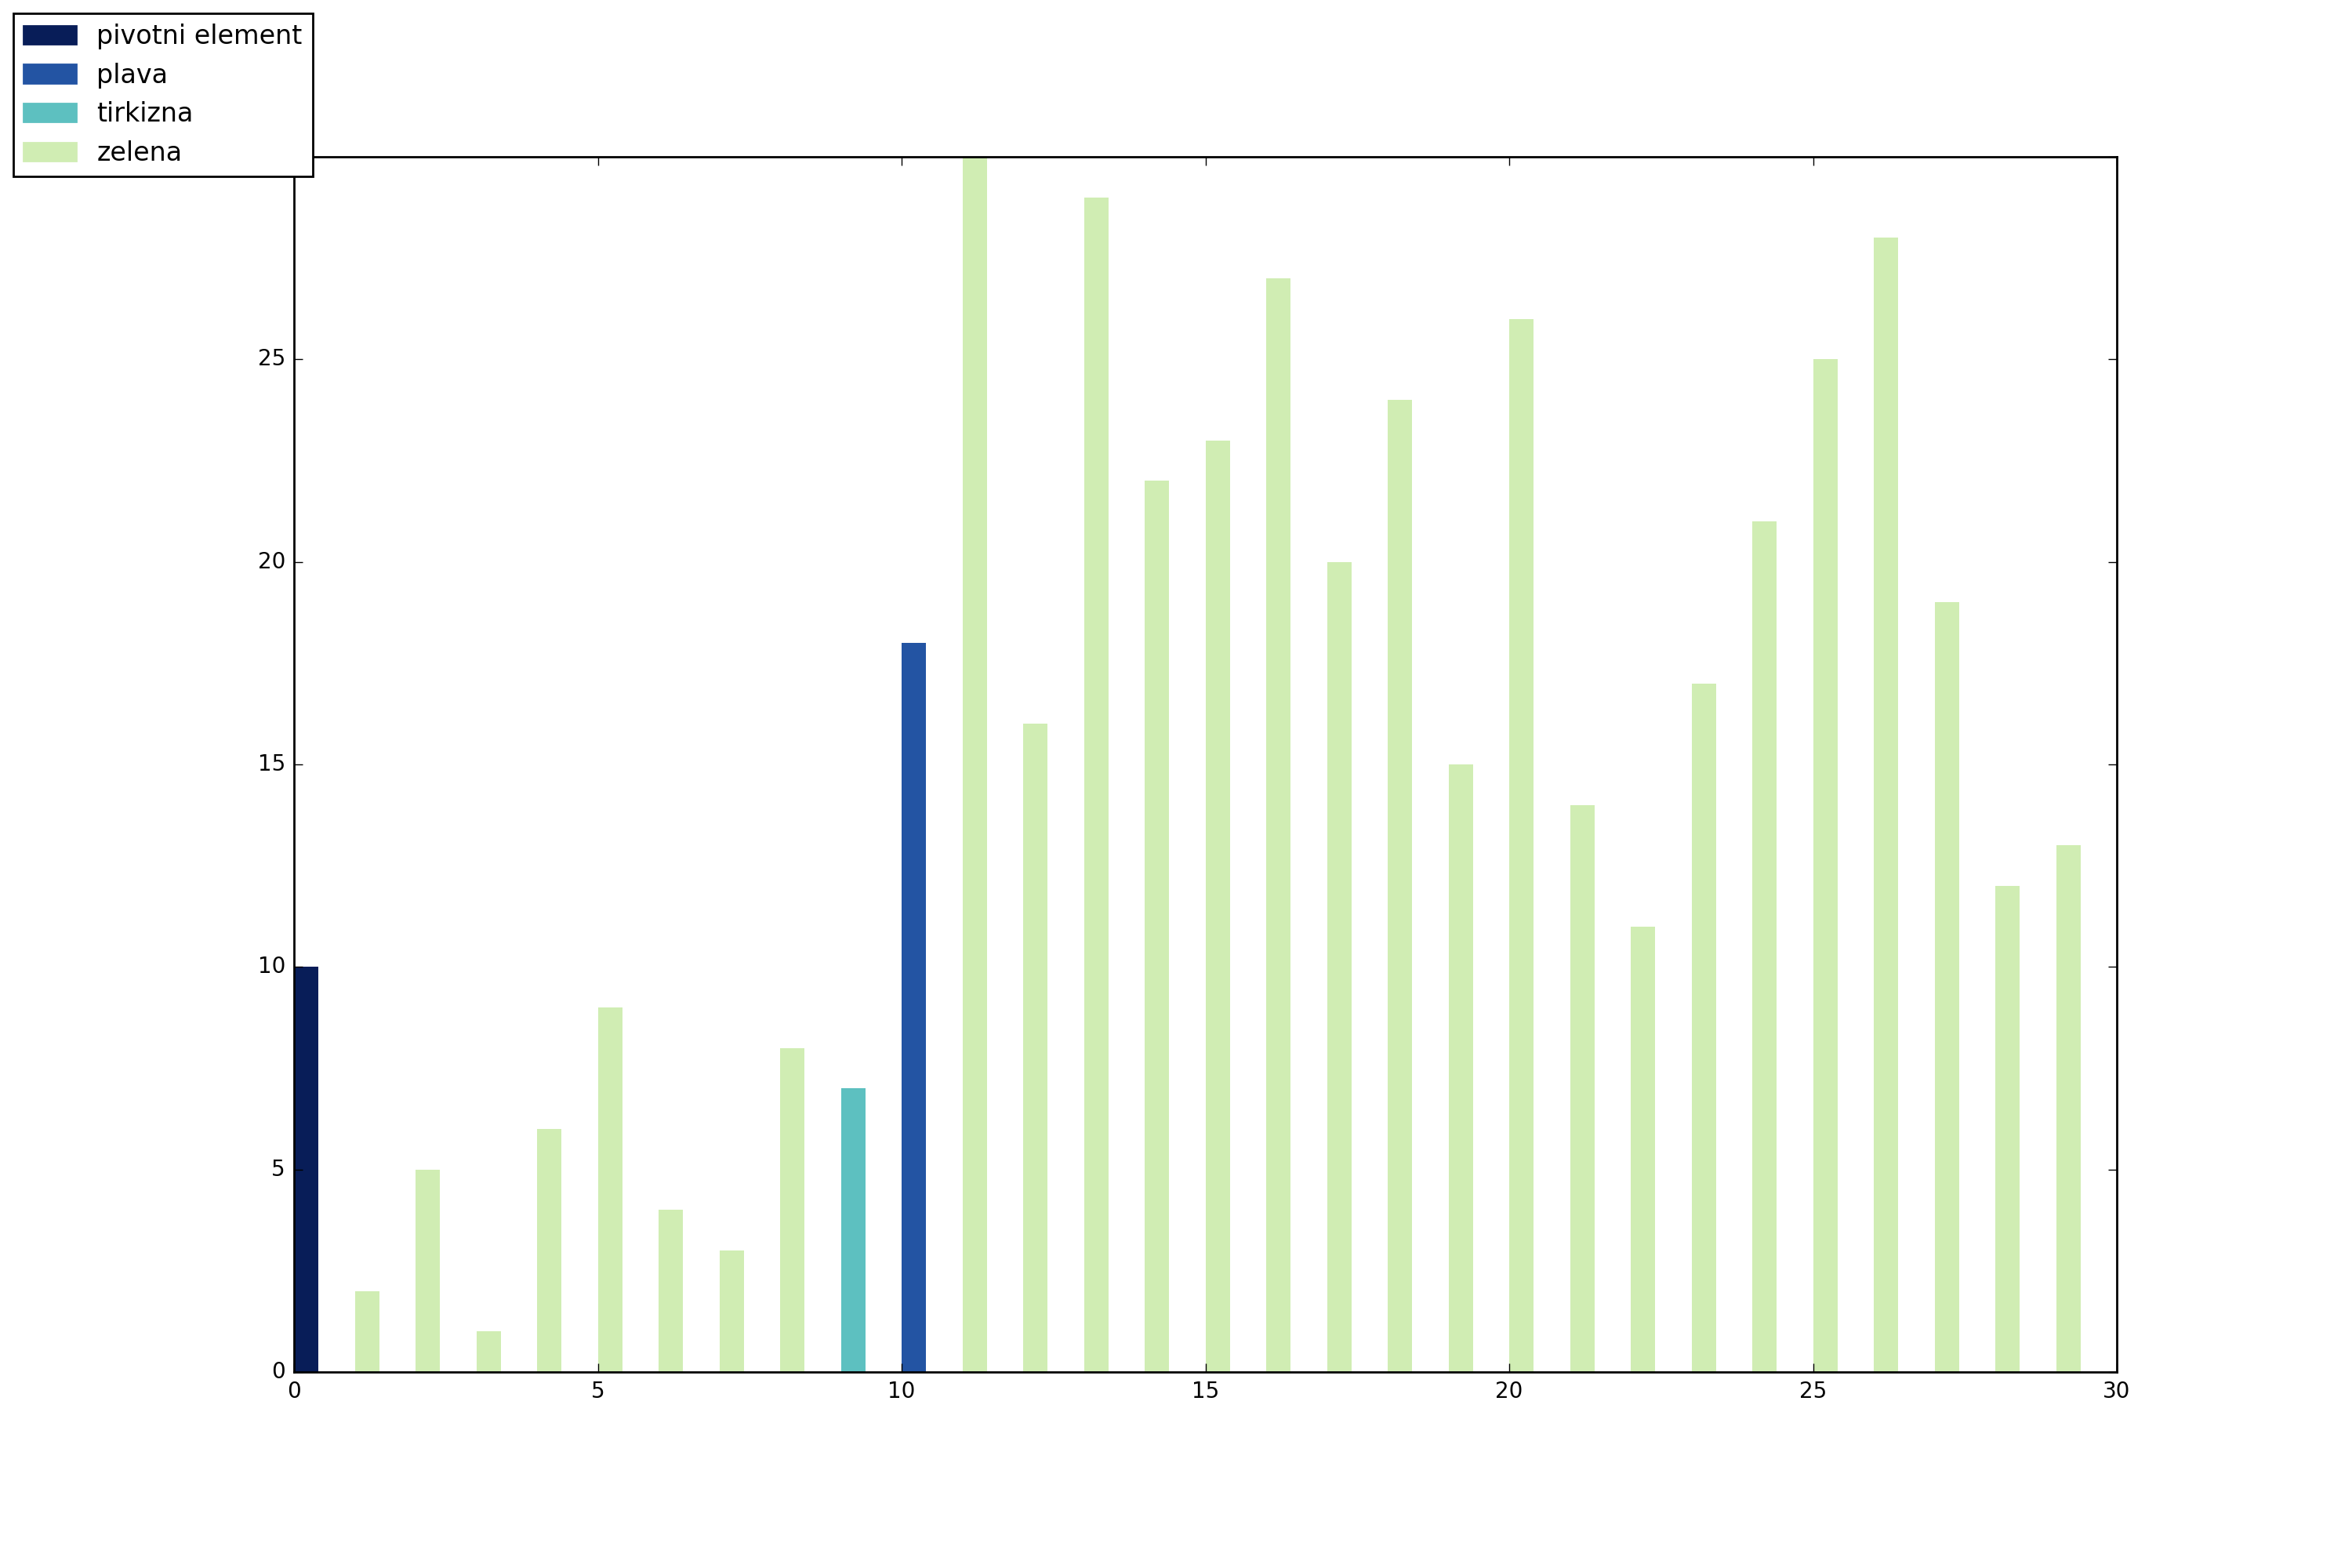

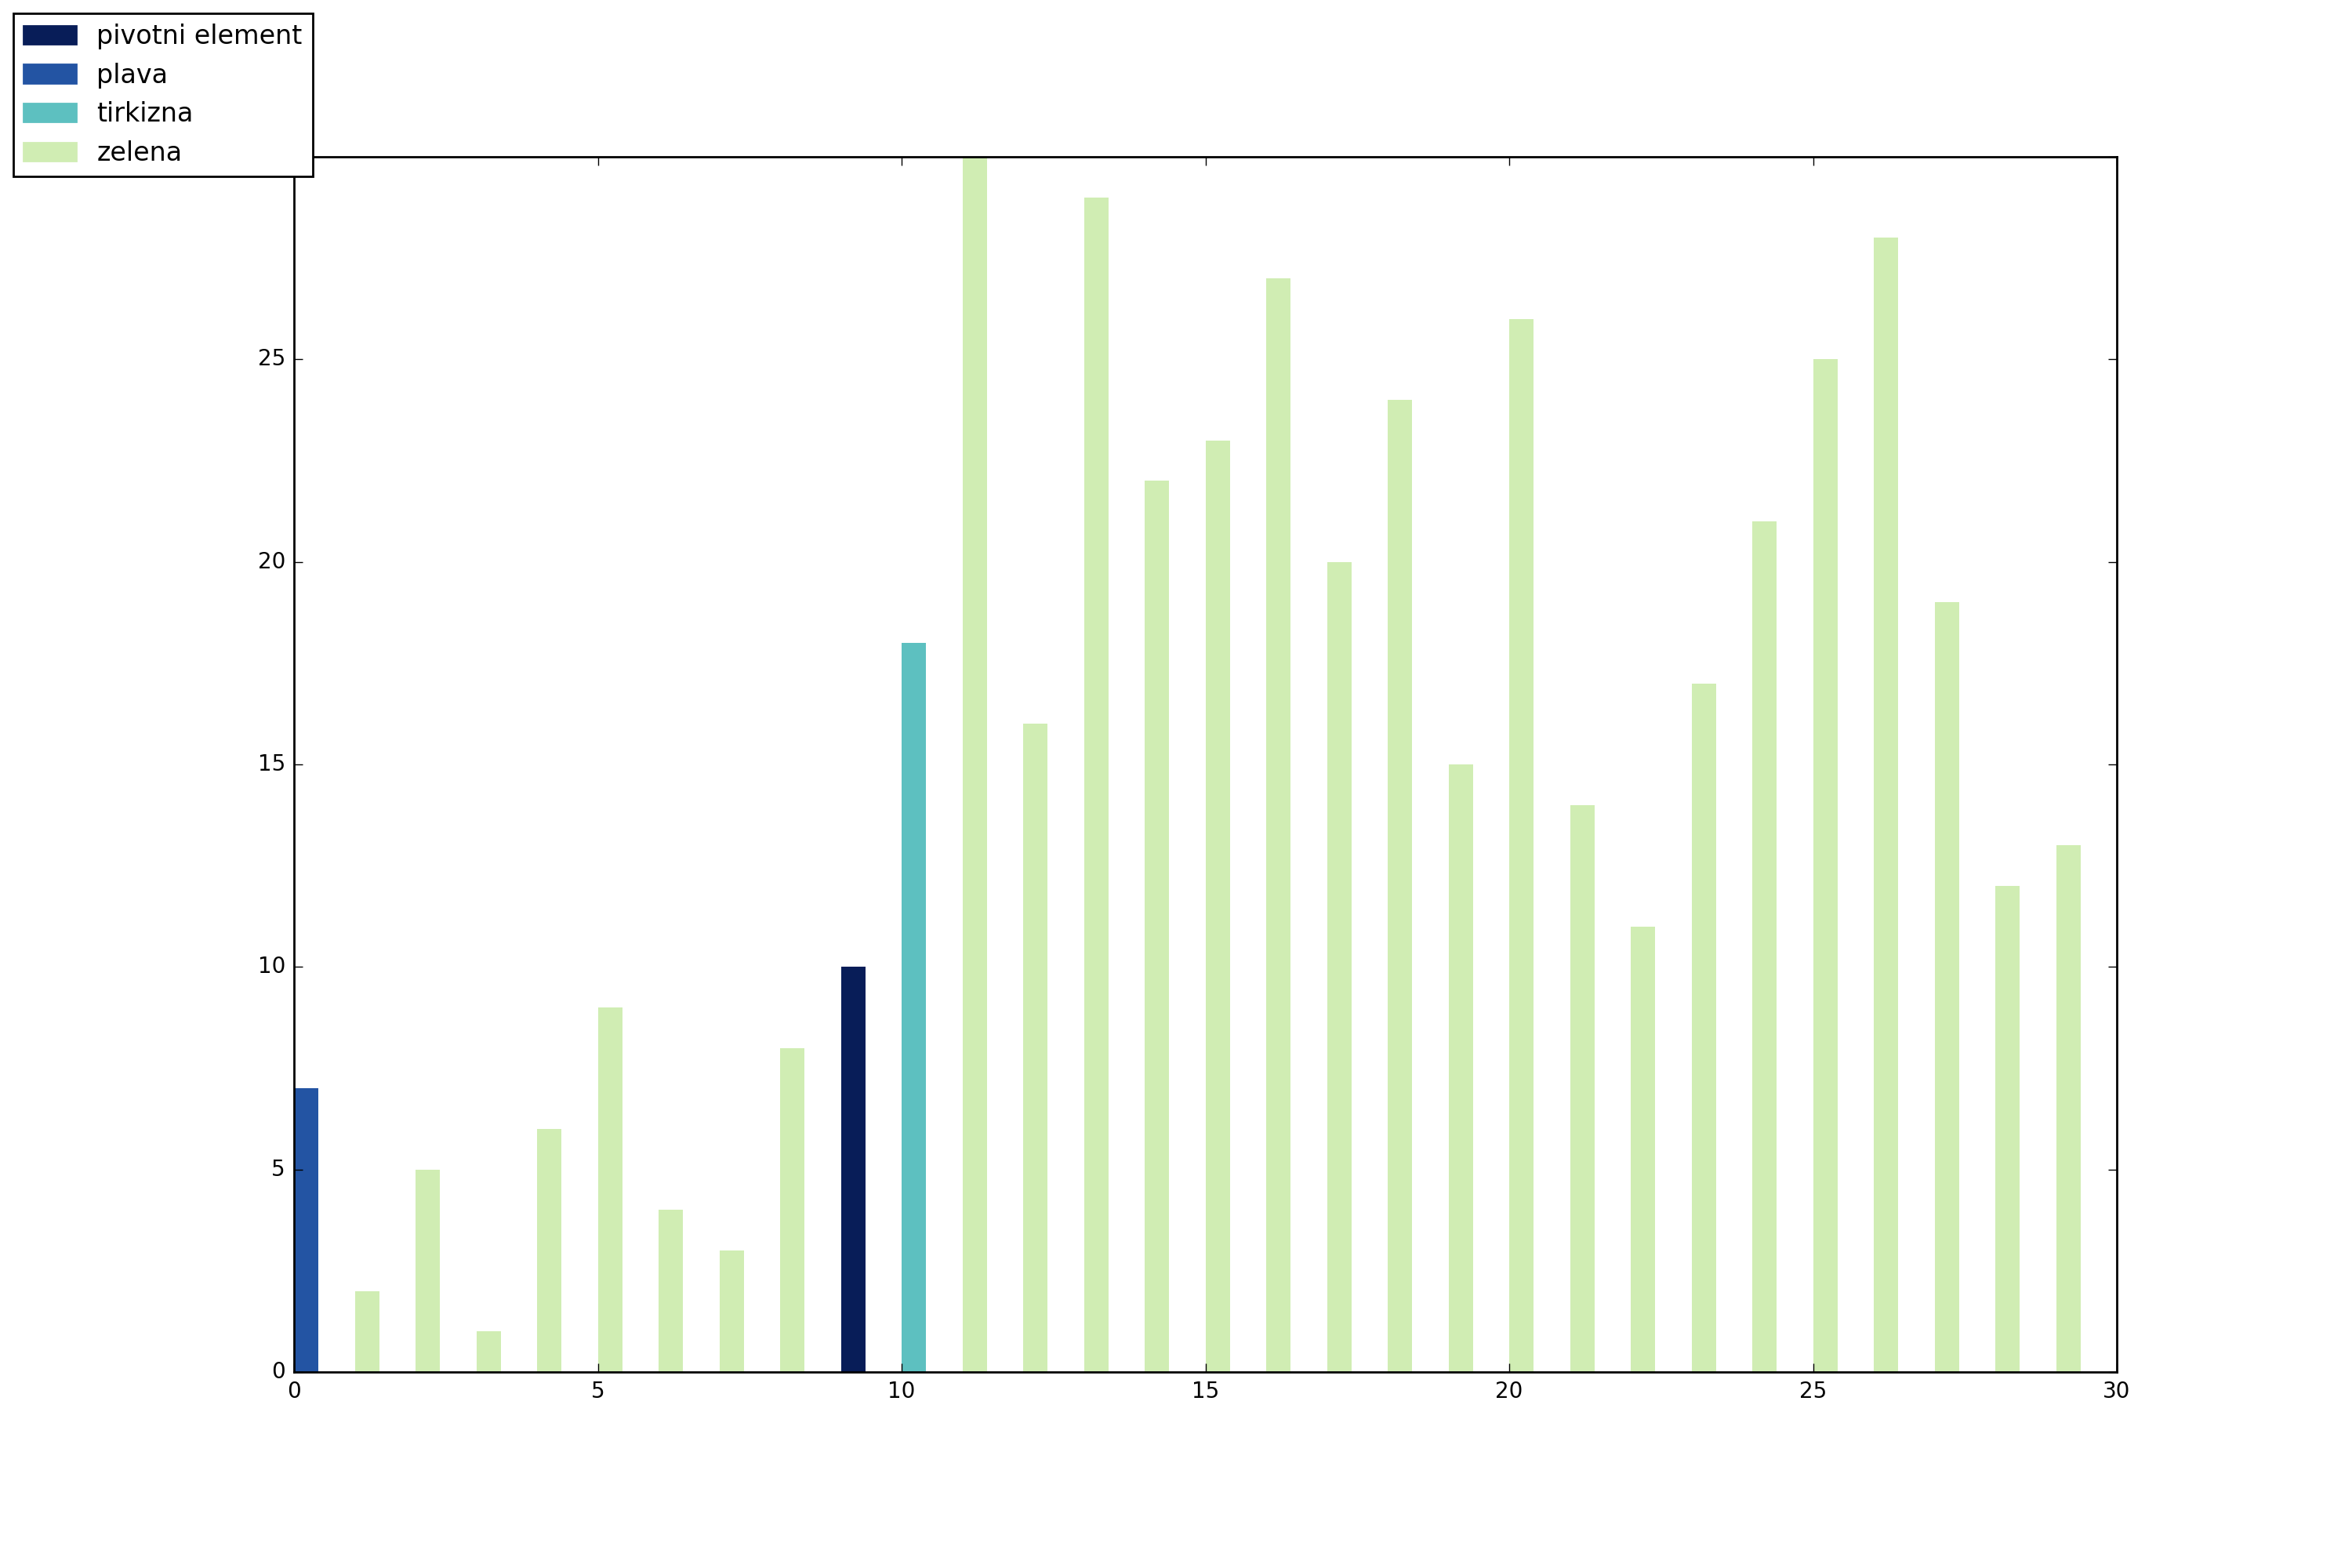

In [117]:
from IPython.display import Image,display_png
x=Image(filename='prije_zamjene_pivota.png', width=400, height=200) 
y=Image(filename='nakon_zamjene_pivota.png',  width=400, height=200) 
display(x,y)

<font size=3>Nakon što se provede prvi prolazak kroz polje, desno od plavog stupca uključivši njega su svi stupci veći od pivotnog elementa, a lijevo od tirkiznog stupca su svi manji od pivotnog elementa. [slika1]<br>
Zatim se pivotni element zamjenjuje sa manjim od(plavi, tirkizni) [slika2], te se quicksort poziva rekurzivno na dva manja potpolja,
jedno lijevo od pivotnog elementa, drugo desno od pivotnog elementa.</font>

<br><center><font color="#0059b3" size=4>Za kraj pogledajmo složenosti ovih algoritama </font></center>

<table >
  <thead >
    <tr>
      <th>Algoritam</th>
      <th colspan="3"><center>Vremenska složenost</center></th>
      <th>Prostorna složenost</th>
    </tr>
    <tr>
      <th></th>
      <th bgcolor="#b3e0ff">Najbolja</th>
      <th bgcolor="#4db8ff">Prosječna</th>  
      <th bgcolor="#0099ff">Najgora</th>     
      <th bgcolor="#adebeb"><center>Najgora</center></th>            
    </tr>
  </thead>
  <tbody>
    <tr>
      <td bgcolor="#ffeb99">Quicksort</td>
      <td><code><center>O(nlog(n))</center></code></td>
      <td><code><center>O(nlog(n))</center></code></td>
      <td><code><center>O(n^2)</center></code></td>
      <td><code><center>O(log(n))</center></code></td>
    </tr>
   
    <tr>
      <td bgcolor="#ffcc66">Bubble Sort</td>
      <td><code ><center>O(n)</center></code></td>
      <td><code ><center>O(n^2)</center></code></td>
      <td><code ><center>O(n^2)</center></code></td>
      <td><code ><center>O(1)</center></code></td>
    </tr>
    <tr>
      <td bgcolor="#ff9966">Insertion Sort</td>
      <td><code><center>O(n)</center></code></td>
      <td><code><center>O(n^2)</center></code></td>
      <td><code><center>O(n^2)</center></code></td>
      <td><code><center>O(1)</center></code></td>
    </tr>
    
  </tbody>
</table>

Nacrtati ćemo najbolje i prosječne vremenske složenosti ovih algoritama

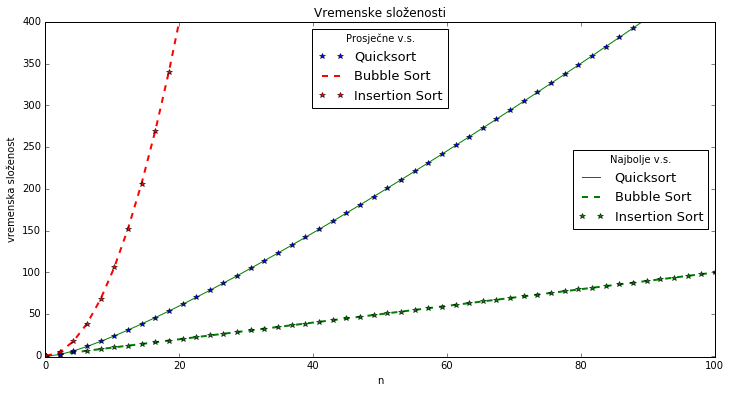

In [118]:
n = np.linspace(0.1,100)
fig, axes = plt.subplots()
fig.set_size_inches(12,6)
axes.set_xlabel('n') 
axes.set_ylabel('vremenska složenost')
axes.set_title('Vremenske složenosti')
axes.set_xlim(0,100),axes.set_ylim(-1, 400);

line1, =axes.plot(n, n*np.log(n), 'g-', label="Quicksort");
line2, =axes.plot(n, n, 'g--',linewidth=2, label="Bubble Sort");
line3, =axes.plot(n, n, 'g*',linewidth=1,label="Insertion Sort");
first_legend = plt.legend(handles=[line1, line2,line3],  loc=7, title="Najbolje v.s.", fontsize=13)
ax = plt.gca().add_artist(first_legend)

line4, =axes.plot(n, n*np.log(n), 'b*', label="Quicksort");
line5, =axes.plot(n, n**2, 'r--',linewidth=2, label="Bubble Sort");
line6, =axes.plot(n, n**2, 'r*',linewidth=1,label="Insertion Sort");
plt.legend(handles=[line4,line5,line6], loc=9, title= "Prosječne v.s.", fontsize=13);

<br><center><font color="#0059b3" size=6>Zaključak </font></center>

<center><font size=3>
<li>Promotrili smo neke osnovne algoritme za sortiranje, i princip njihova izvođenja</li><br>
<li>Insertion sort je jednostavan kod koji je dovoljno brz na malom broju elemenata za
sortiranje</li><br>
<li> Bubble sort je idealan samo za pojašnjeni poseban slučaj :)</li><br>
<li> Quicksort svojim podijeli-pa-vladaj pristupom ima najbolju prosječnu vremensku složenost pa je najčešće i najbolji za korištenje</li><br>
<li> Postoje još mnogi drugi razrađeni algoritmi za sortiranje </font> </center>